## RFM ANALYSIS

##### PROBLEM STATEMENT

#### An automobile parts manufacturing company has collected data of transactions for 3 years. They do not have any in-house data science team, thus they have hired you as their consultant. Your job is to use your magical data science skills to provide them with suitable insights about their data and their customers.

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_excel('Sales_Data.xlsx')

### EDA

In [4]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2018-02-24,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2018-05-07,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2018-07-01,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2018-08-25,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,2018-10-28,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


In [5]:
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,DAYS_SINCE_LASTORDER,MSRP
count,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000
mean,10259.761558,35.103021,101.098951,6.491081,3553.047583,1757.085912,100.691664
std,91.877521,9.762135,42.042548,4.230544,1838.953901,819.280576,40.114802
min,10100.000000,6.000000,26.880000,1.000000,482.130000,42.000000,33.000000
25%,10181.000000,27.000000,68.745000,3.000000,2204.350000,1077.000000,68.000000
50%,10264.000000,35.000000,95.550000,6.000000,3184.800000,1761.000000,99.000000
75%,10334.500000,43.000000,127.100000,9.000000,4503.095000,2436.500000,124.000000
max,10425.000000,97.000000,252.870000,18.000000,14082.800000,3562.000000,214.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ORDERNUMBER           2747 non-null   int64         
 1   QUANTITYORDERED       2747 non-null   int64         
 2   PRICEEACH             2747 non-null   float64       
 3   ORDERLINENUMBER       2747 non-null   int64         
 4   SALES                 2747 non-null   float64       
 5   ORDERDATE             2747 non-null   datetime64[ns]
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64         
 7   STATUS                2747 non-null   object        
 8   PRODUCTLINE           2747 non-null   object        
 9   MSRP                  2747 non-null   int64         
 10  PRODUCTCODE           2747 non-null   object        
 11  CUSTOMERNAME          2747 non-null   object        
 12  PHONE                 2747 non-null   object        
 13  ADDRESSLINE1      

In [7]:
for feature in df.columns: 
    if  df[feature].dtype == 'object':
         df[feature] = pd.Categorical( df[feature]).codes

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ORDERNUMBER           2747 non-null   int64         
 1   QUANTITYORDERED       2747 non-null   int64         
 2   PRICEEACH             2747 non-null   float64       
 3   ORDERLINENUMBER       2747 non-null   int64         
 4   SALES                 2747 non-null   float64       
 5   ORDERDATE             2747 non-null   datetime64[ns]
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64         
 7   STATUS                2747 non-null   int8          
 8   PRODUCTLINE           2747 non-null   int8          
 9   MSRP                  2747 non-null   int64         
 10  PRODUCTCODE           2747 non-null   int8          
 11  CUSTOMERNAME          2747 non-null   int8          
 12  PHONE                 2747 non-null   int8          
 13  ADDRESSLINE1      

In [9]:
df.shape

(2747, 20)

There are 2747 rows and 20 columns in the dataset.

In [10]:
df.isna().sum()

ORDERNUMBER             0
QUANTITYORDERED         0
PRICEEACH               0
ORDERLINENUMBER         0
SALES                   0
ORDERDATE               0
DAYS_SINCE_LASTORDER    0
STATUS                  0
PRODUCTLINE             0
MSRP                    0
PRODUCTCODE             0
CUSTOMERNAME            0
PHONE                   0
ADDRESSLINE1            0
CITY                    0
POSTALCODE              0
COUNTRY                 0
CONTACTLASTNAME         0
CONTACTFIRSTNAME        0
DEALSIZE                0
dtype: int64

There is no null values present within the dataset.

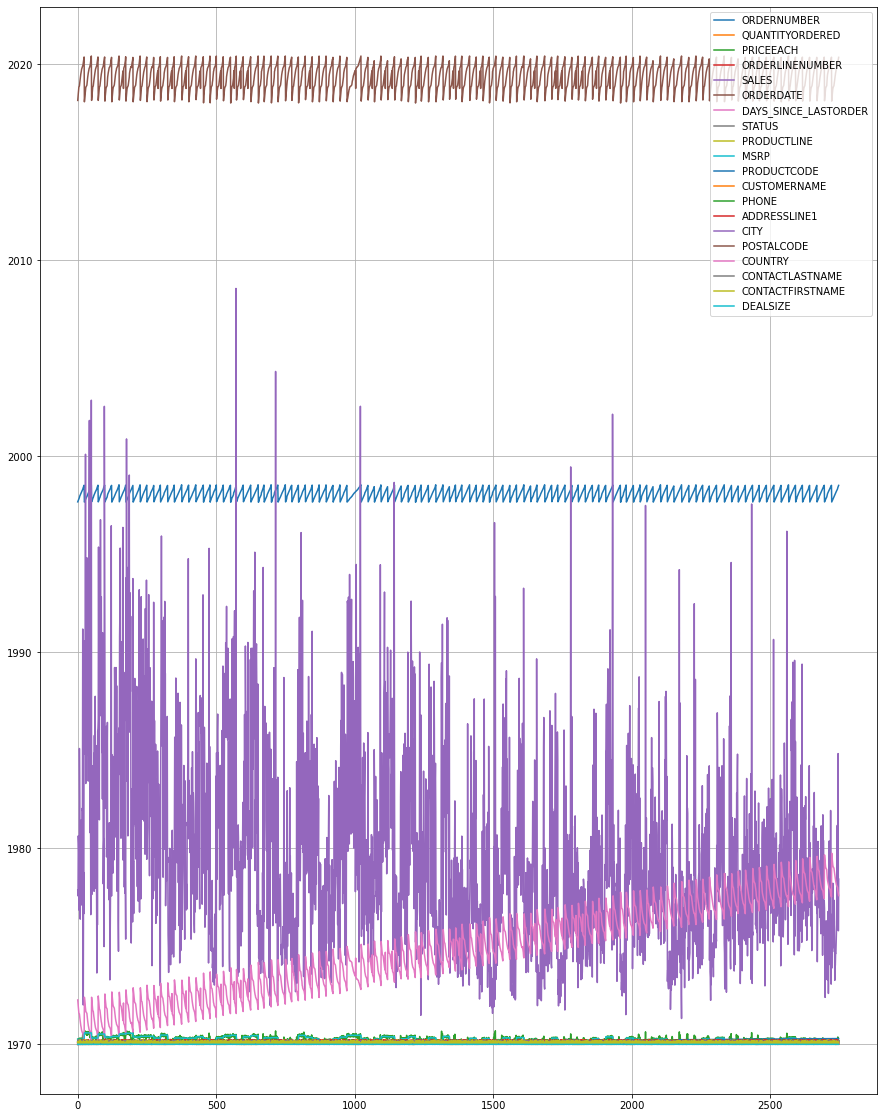

In [18]:
df.plot(figsize=(15,20))
plt.grid();

In [35]:
from datetime import datetime
now = datetime.now()

In [36]:
df['recency_days']= df['ORDERDATE'].apply(lambda x:now-x)

df['recency_days']= df['recency_days'].apply(lambda x:x.days)

In [44]:
df_rfm=df.rename(columns={'SALES':'monetary','recency_days':'recency','QUANTITYORDERED': 'frequency'})

In [45]:
df_rfm

,ORDERNUMBER,frequency,PRICEEACH,ORDERLINENUMBER,monetary,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,...,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,recency
0,10107,30,95.70,2,2871.00,2018-02-24,828,5,1,95,...,44,48,54,41,0,18,75,36,2,1548
1,10121,34,81.35,5,2765.90,2018-05-07,757,5,1,95,...,63,53,39,55,27,6,27,54,2,1476
2,10134,41,94.74,2,3884.34,2018-07-01,703,5,1,95,...,45,16,21,51,41,6,16,11,1,1421
3,10145,45,83.26,6,3746.70,2018-08-25,649,5,1,95,...,82,75,51,52,49,18,74,31,1,1366
4,10168,36,96.66,1,3479.76,2018-10-28,586,5,1,95,...,76,76,55,12,54,18,29,32,1,1302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2742,10350,20,112.22,15,2244.40,2019-12-02,2924,5,3,54,...,32,13,62,33,14,14,24,13,2,902
2743,10373,29,137.19,1,3978.51,2020-01-31,2865,5,3,54,...,60,87,84,50,50,5,38,56,1,842
2744,10386,43,125.99,4,5417.57,2020-03-01,2836,4,3,54,...,32,13,62,33,14,14,24,13,1,812
2745,10397,34,62.24,1,2116.16,2020-03-28,2810,5,3,54,...,1,68,0,66,16,6,58,5,2,785


In [47]:
df_1=df_rfm[['recency','frequency','monetary']]

In [48]:
df_1.head()

,recency,frequency,monetary
0,1548,30,2871.00
1,1476,34,2765.90
2,1421,41,3884.34
3,1366,45,3746.70
4,1302,36,3479.76


### RFM (Recency - Frequency - Monetary):

In [41]:
!pip install crm-rfm-modeling

In [51]:
from crm_rfm_modeling import rfm
from crm_rfm_modeling.rfm import RFM

model = RFM(weights=(0.15, 0.28, 0.57))

In [52]:
model.fit(df_1)

In [53]:
model.summary_statistics()

,recency_scores,frequency_scores,monetary_scores
1,0.203859,0.233710,0.200218
2,0.196942,0.192210,0.199854
3,0.207499,0.190754,0.199854
4,0.192210,0.214780,0.199854
5,0.199490,0.168548,0.200218


In [54]:
pd.DataFrame(model.cutoffs)

,recency,frequency,monetary
0,"(1597, 1308.0)","(6, 26.0)","(482.13, 2006.218)"
1,"(1308.0, 1186.0)","(26.0, 32.0)","(2006.218, 2793.284)"
2,"(1186.0, 987.0)","(32.0, 38.0)","(2793.284, 3608.712)"
3,"(987.0, 902.0)","(38.0, 45.0)","(3608.712, 4943.904000000002)"
4,"(902.0, 721)","(45.0, 97)","(4943.904000000002, 14082.8)"


In [55]:
df_fitted=model.fitted_data
df_fitted.head()


,recency,frequency,monetary,recency_scores,frequency_scores,monetary_scores,recency_weighted,frequency_weighted,monetary_weighted
0,1548,30,2871.00,1,2,3,0.15,0.56,1.71
1,1476,34,2765.90,1,3,2,0.15,0.84,1.14
2,1421,41,3884.34,1,4,4,0.15,1.12,2.28
3,1366,45,3746.70,1,4,4,0.15,1.12,2.28
4,1302,36,3479.76,2,3,3,0.30,0.84,1.71


In [59]:
df_fitted.sort_values(['recency_scores','frequency_scores','monetary_scores'],ascending=[False,False,False]).head(10)

,recency,frequency,monetary,recency_scores,frequency_scores,monetary_scores,recency_weighted,frequency_weighted,monetary_weighted
23,739,66,7516.08,5,5,5,0.75,1.4,2.85
49,721,50,12001.00,5,5,5,0.75,1.4,2.85
96,774,66,11886.60,5,5,5,0.75,1.4,2.85
97,739,56,9218.16,5,5,5,0.75,1.4,2.85
121,781,64,9661.44,5,5,5,0.75,1.4,2.85
221,894,49,5960.36,5,5,5,0.75,1.4,2.85
222,853,49,8470.14,5,5,5,0.75,1.4,2.85
225,721,49,7969.36,5,5,5,0.75,1.4,2.85
248,774,66,8648.64,5,5,5,0.75,1.4,2.85
274,747,47,8236.75,5,5,5,0.75,1.4,2.85


In [67]:
df_fitted[df_fitted.monetary_scores==5].head(10)

,recency,frequency,monetary,recency_scores,frequency_scores,monetary_scores,recency_weighted,frequency_weighted,monetary_weighted
6,1281,48,5512.32,2,5,5,0.30,1.40,2.85
18,910,41,7737.93,4,4,5,0.60,1.12,2.85
23,739,66,7516.08,5,5,5,0.75,1.40,2.85
24,1574,26,5404.62,1,1,5,0.15,0.28,2.85
25,1520,29,7209.11,1,2,5,0.15,0.56,2.85
26,1455,38,7329.06,1,3,5,0.15,0.84,2.85
27,1398,37,7374.10,1,3,5,0.15,0.84,2.85
28,1341,45,10993.50,1,4,5,0.15,1.12,2.85
30,1293,34,8014.82,2,3,5,0.30,0.84,2.85
31,1286,23,5372.57,2,1,5,0.30,0.28,2.85


### Interpretations:
Based on RFM analysis ID 23 & 49 are the best customers. (555)

Recency scores ,Frequency score and the monetary score values = 5 is for all top 10 customers. 

The monetary score 5 is for ID 6,18,24 etc which are not in top 10 as per the sort_values(). You can adjust that by sorting only by monetary score.

Customer ID 23 comes under both top 10 customers and monetary score 5.